In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#import data
players=pd.read_csv('res/Players.csv', dtype='unicode')
Seasons=pd.read_csv('res/Seasons_Stats.csv', dtype='unicode')
#clean data
players['college'] = players['collage']
players.drop('collage', axis=1, inplace=True)
players.drop('Unnamed: 0', axis=1, inplace=True)
players[['Age']] = players[['Age']].apply(pd.to_numeric)
Seasons=Seasons[Seasons['Player'] !=0]
Seasons.drop('Unnamed: 0', axis=1,inplace=True)
Seasons[['PTS','STL','AST','ORB','DRB','BLK','G','TRB']] = Seasons[['PTS','STL','AST','ORB','DRB','BLK','G','TRB']].apply(pd.to_numeric)
Seasons = Seasons.rename(index=str, columns={"PTS": "points", "Pos": "position", "Tm": "team", "G": "games", "GS": "games_started",
                                        "MP": "minutes_played", "BLK": "blocks", "TOV": "turnovers", "PF": "personal_fouls",
                                        "AST": "assists", "STL": "steals", "DRB": "defensive_rebounds", "ORB": "offensive_rebounds",
                                  "TRB": "total_rebounds"})
Seasons.head()
#players.dropna(how='all',inplace=True)
#players.set_index('Player',inplace=True)

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,FT%,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217,458.0
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99,279.0
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192,438.0
3,1950,Ed Bartels,F,24,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29,63.0
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27,59.0
5,1950,Ed Bartels,F,24,NYK,2.0,NaN,NaN,NaN,0.376,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2,4.0
6,1950,Ralph Beard,G,22,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132,895.0
7,1950,Gene Berce,G-F,23,TRI,3.0,NaN,NaN,NaN,0.275,...,0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6,10.0
8,1950,Charlie Black,F-C,28,TOT,65.0,NaN,NaN,NaN,0.346,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273,661.0
9,1950,Charlie Black,F-C,28,FTW,36.0,NaN,NaN,NaN,0.362,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140,382.0


In [41]:
# fix height and weight
players[['height','weight']] = players[['height','weight']].apply(pd.to_numeric)
players['height'] = players['height'] * 0.0328084 # cm -> ft
players['weight'] = players['weight'] * 2.20462 # kg -> lb

In [42]:
#players['pos'] = players.Player.apply(lambda x: Seasons.Pos[Seasons.Player == x].values[0])
Seasons['height'] = Seasons.Player.apply(lambda x: players.height[players.Player == x].values)
Seasons['weight'] = Seasons.Player.apply(lambda x: players.weight[players.Player == x].values)
Seasons['college'] = Seasons.Player.apply(lambda x: players.college[players.Player == x].values)
Seasons['born'] = Seasons.Player.apply(lambda x: players.born[players.Player == x].values)
Seasons['birth_city'] = Seasons.Player.apply(lambda x: players.birth_city[players.Player == x].values)
Seasons['birth_state'] = Seasons.Player.apply(lambda x: players.birth_state[players.Player == x].values)
Seasons

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,blocks,turnovers,personal_fouls,points,height,weight,college,born,birth_city,birth_state
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,217,458.0,[5.905512],[169.75574],[Indiana University],[1918],[nan],[nan]
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,99,279.0,[6.1679792],[182.98346],[University of Kentucky],[1921],[Yorktown],[Indiana]
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,NaN,192,438.0,[6.3320212],[189.59732],[University of Notre Dame],[1924],[nan],[nan]
3,1950,Ed Bartels,F,24,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,NaN,29,63.0,[6.4304464],[194.00656],[North Carolina State University],[1925],[nan],[nan]
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,...,NaN,NaN,27,59.0,[6.4304464],[194.00656],[North Carolina State University],[1925],[nan],[nan]
5,1950,Ed Bartels,F,24,NYK,2.0,NaN,NaN,NaN,0.376,...,NaN,NaN,2,4.0,[6.4304464],[194.00656],[North Carolina State University],[1925],[nan],[nan]
6,1950,Ralph Beard,G,22,INO,60.0,NaN,NaN,NaN,0.422,...,NaN,NaN,132,895.0,[5.8398952],[174.16498],[University of Kentucky],[1927],[Hardinsburg],[Kentucky]
7,1950,Gene Berce,G-F,23,TRI,3.0,NaN,NaN,NaN,0.275,...,NaN,NaN,6,10.0,[5.905512],[174.16498],[Marquette University],[1926],[nan],[nan]
8,1950,Charlie Black,F-C,28,TOT,65.0,NaN,NaN,NaN,0.346,...,NaN,NaN,273,661.0,[6.4304464],[198.4158],[University of Kansas],[1921],[Arco],[Idaho]
9,1950,Charlie Black,F-C,28,FTW,36.0,NaN,NaN,NaN,0.362,...,NaN,NaN,140,382.0,[6.4304464],[198.4158],[University of Kansas],[1921],[Arco],[Idaho]


In [43]:
Seasons['height'] = Seasons['height'].str.get(0)
Seasons['weight'] = Seasons['weight'].str.get(0)
Seasons['college'] = Seasons['college'].str.get(0)
Seasons['born'] = Seasons['born'].str.get(0)
Seasons['birth_city'] = Seasons['birth_city'].str.get(0)
Seasons['birth_state'] = Seasons['birth_state'].str.get(0)

In [58]:
Seasons['hall_of_fame'] = "n"
Seasons.loc[Seasons['Player'].str.contains("\*", na=False), 'hall_of_fame'] = "y"
Seasons['Player'] = Seasons['Player'].str.replace("\*", "")

In [59]:
Seasons.columns.values

array(['Year', 'Player', 'position', 'Age', 'team', 'games',
       'games_started', 'minutes_played', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'offensive_rebounds',
       'defensive_rebounds', 'total_rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'personal_fouls', 'points', 'height',
       'weight', 'college', 'born', 'birth_city', 'birth_state', 'ppg',
       'spg', 'apg', 'orpg', 'drpg', 'rpg', 'bpg', 'rating_per_game',
       'hall_of_fame'], dtype=object)

In [48]:

#Seasons.dropna(how='all',inplace=True)
#Seasons.set_index('Player',inplace=True)

TypeError: unsupported operand type(s) for /: 'dict' and 'float'

In [60]:
#add columns for per game stats
Seasons['ppg'] = Seasons.points/Seasons.games
Seasons['spg'] = Seasons.steals/Seasons.games
Seasons['apg'] = Seasons.assists/Seasons.games
Seasons['orpg'] = Seasons.offensive_rebounds/Seasons.games
Seasons['drpg'] = Seasons.defensive_rebounds/Seasons.games
Seasons['rpg'] = Seasons.total_rebounds/Seasons.games
Seasons['bpg'] = Seasons['blocks']/Seasons.games

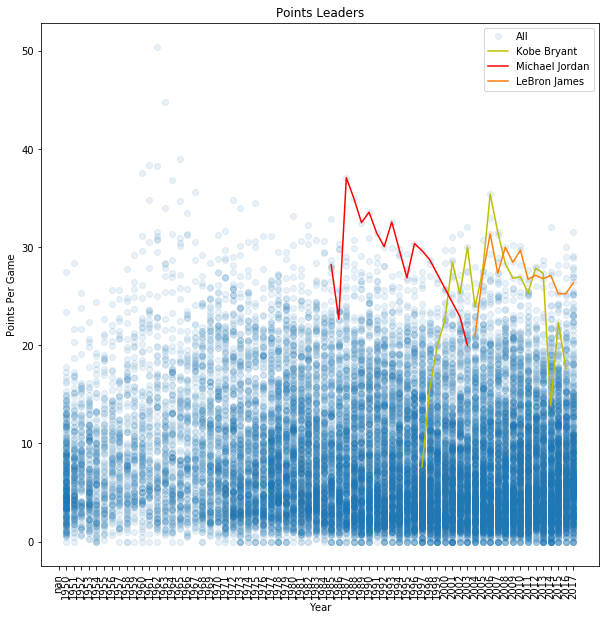

In [61]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['ppg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.ppg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.ppg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.ppg[Seasons.Player == 'LeBron James'])
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Points Per Game')
plt.title('Points Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

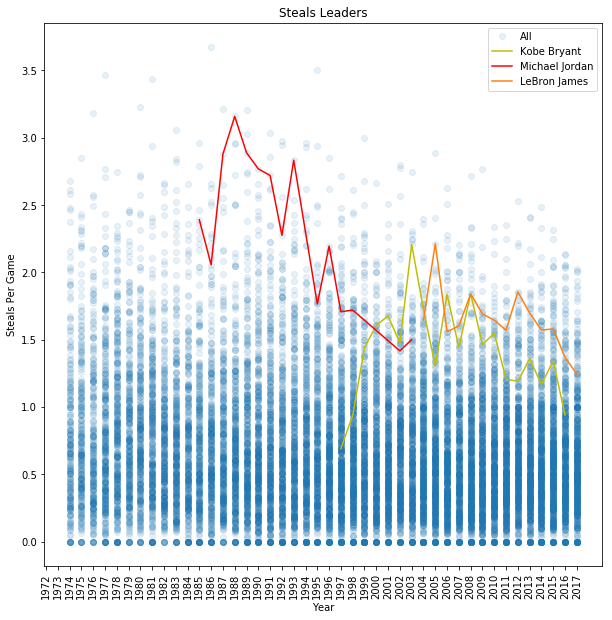

In [62]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['spg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.spg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.spg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.spg[Seasons.Player == 'LeBron James'])
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Steals Per Game')
plt.title('Steals Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

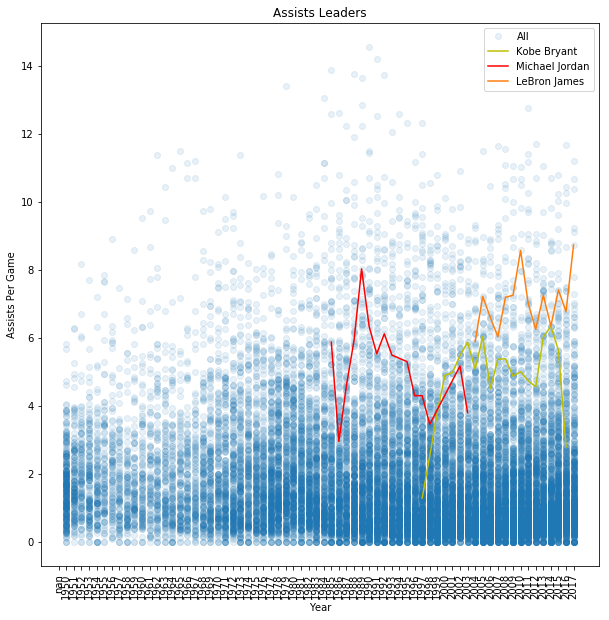

In [63]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['apg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.apg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.apg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.apg[Seasons.Player == 'LeBron James'])
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Assists Per Game')
plt.title('Assists Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

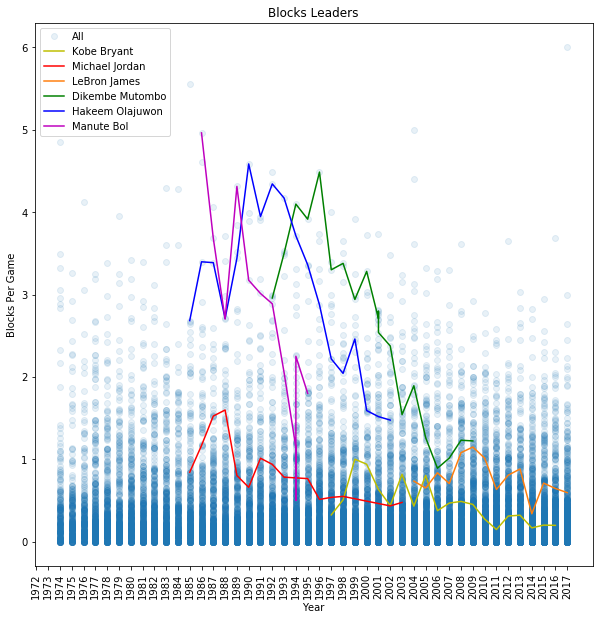

In [64]:
plt.figure(figsize = (10,10))
plt.plot(Seasons['Year'],Seasons['bpg'],'o', alpha = 0.1)
plt.plot(Seasons.Year[Seasons.Player == 'Kobe Bryant'],Seasons.bpg[Seasons.Player == 'Kobe Bryant'], color = 'y')
plt.plot(Seasons.Year[Seasons.Player == 'Michael Jordan'],Seasons.bpg[Seasons.Player == 'Michael Jordan'], color = 'r')
plt.plot(Seasons.Year[Seasons.Player == 'LeBron James'],Seasons.bpg[Seasons.Player == 'LeBron James'])
plt.plot(Seasons.Year[Seasons.Player == 'Dikembe Mutombo'],Seasons.bpg[Seasons.Player == 'Dikembe Mutombo'], color = 'g')
plt.plot(Seasons.Year[Seasons.Player == 'Hakeem Olajuwon'],Seasons.bpg[Seasons.Player == 'Hakeem Olajuwon'], color = 'b')
plt.plot(Seasons.Year[Seasons.Player == 'Manute Bol'],Seasons.bpg[Seasons.Player == 'Manute Bol'], color = 'm')
plt.legend(['All','Kobe Bryant','Michael Jordan','LeBron James', 'Dikembe Mutombo', 'Hakeem Olajuwon', 'Manute Bol'], fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Blocks Per Game')
plt.title('Blocks Leaders')
plt.axis('normal')
plt.xticks(rotation='vertical')
plt.show()

In [65]:
Seasons.loc[Seasons['blocks']>300, :]

,Year,Player,position,Age,team,games,games_started,minutes_played,PER,TS%,...,birth_state,ppg,spg,apg,orpg,drpg,rpg,bpg,rating_per_game,hall_of_fame
4047,1974,Elmore Smith,C,24,LAL,81.0,NaN,2922,14.5,0.479,...,Georgia,12.530864,0.876543,1.851852,2.518519,8.666667,11.185185,4.851852,45.916049,n
4375,1976,Kareem Abdul-Jabbar,C,28,LAL,82.0,NaN,3379,27.2,0.567,...,New York,27.743902,1.451220,5.036585,3.317073,13.548780,16.865854,4.121951,72.257317,y
5382,1979,Kareem Abdul-Jabbar,C,31,LAL,80.0,NaN,3157,25.5,0.612,...,New York,23.787500,0.950000,5.387500,2.587500,10.225000,12.812500,3.950000,61.943750,y
7115,1983,Tree Rollins,C,27,ATL,80.0,80,2472,15.4,0.543,...,Florida,7.750000,0.612500,0.937500,2.625000,6.662500,9.287500,4.287500,35.001250,n
7288,1984,Mark Eaton,C,27,UTA,82.0,78,2139,12.3,0.49,...,California,5.621951,0.304878,1.378049,1.804878,5.451220,7.256098,4.280488,30.152439,n
7638,1985,Mark Eaton,C,28,UTA,82.0,82,2813,13.6,0.502,...,California,9.682927,0.439024,1.512195,2.524390,8.780488,11.304878,5.560976,43.517073,n
7944,1986,Manute Bol,C,23,WSB,80.0,60,2090,11.2,0.472,...,South Sudan,3.725000,0.350000,0.287500,1.537500,4.425000,5.962500,4.962500,27.248750,n
8012,1986,Mark Eaton,C,29,UTA,80.0,80,2551,12.2,0.499,...,California,8.450000,0.412500,1.262500,2.150000,6.287500,8.437500,4.612500,35.543750,n
8329,1987,Manute Bol,C,24,WSB,82.0,12,1552,10.9,0.482,...,South Sudan,3.060976,0.243902,0.134146,1.024390,3.390244,4.414634,3.682927,20.340244,n
8391,1987,Mark Eaton,C,30,UTA,79.0,79,2505,11.1,0.448,...,California,7.696203,0.544304,1.329114,2.670886,6.151899,8.822785,4.063291,34.100000,n


In [100]:
#decision tree classification
from sklearn.preprocessing import StandardScaler
features = ['ppg', 'apg', 'rpg', 'bpg', 'spg']
classify_seasons = Seasons
classify_seasons = classify_seasons.fillna(0)
X = classify_seasons[features]
y= classify_seasons["tier"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)


0.90118256925319939

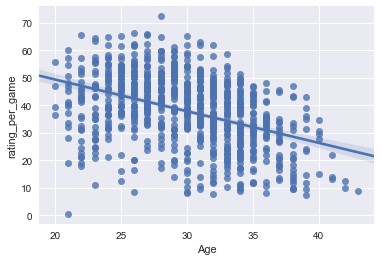

In [82]:
HOF = Seasons[Seasons['hall_of_fame'] == 'y']
sns.regplot(x=HOF["Age"], y=HOF["rating_per_game"])

In [76]:
vorp = pd.DataFrame()
vorp['player'] = Seasons.groupby('Player').mean()['VORP'].player
vorp['vorp'] = Seasons.groupby('Player').mean()['VORP'].values
vorp.sort('vorp', ascending = False).head(10)

KeyError: 'VORP'

In [150]:
Seasons[Seasons['Player'] == "Michael Jordan"]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,born,birth_city,birth_state,ppg,spg,apg,orpg,drpg,bpg,hall_of_fame
7716,1985,Michael Jordan,SG,21,CHI,82.0,82,3144,25.8,0.592,...,1963,Brooklyn,New York,28.207317,2.390244,5.865854,2.036585,4.475610,0.841463,y
8094,1986,Michael Jordan,SG,22,CHI,18.0,7,451,27.5,0.533,...,1963,Brooklyn,New York,22.666667,2.055556,2.944444,1.277778,2.277778,1.166667,y
8469,1987,Michael Jordan,SG,23,CHI,82.0,82,3281,29.8,0.562,...,1963,Brooklyn,New York,37.085366,2.878049,4.597561,2.024390,3.219512,1.524390,y
8869,1988,Michael Jordan,SG,24,CHI,82.0,82,3311,31.7,0.603,...,1963,Brooklyn,New York,34.975610,3.158537,5.914634,1.695122,3.780488,1.597561,y
9297,1989,Michael Jordan,SG,25,CHI,81.0,81,3255,31.1,0.614,...,1963,Brooklyn,New York,32.506173,2.888889,8.024691,1.839506,6.209877,0.802469,y
9747,1990,Michael Jordan,SG,26,CHI,82.0,82,3197,31.2,0.606,...,1963,Brooklyn,New York,33.573171,2.768293,6.329268,1.743902,5.146341,0.658537,y
10212,1991,Michael Jordan,SG,27,CHI,82.0,82,3034,31.6,0.605,...,1963,Brooklyn,New York,31.463415,2.719512,5.524390,1.439024,4.560976,1.012195,y
10666,1992,Michael Jordan,SG,28,CHI,80.0,80,3102,27.7,0.579,...,1963,Brooklyn,New York,30.050000,2.275000,6.112500,1.137500,5.250000,0.937500,y
11106,1993,Michael Jordan,SG,29,CHI,78.0,78,3067,29.7,0.564,...,1963,Brooklyn,New York,32.576923,2.833333,5.487179,1.730769,4.961538,0.782051,y
12048,1995,Michael Jordan,SG,31,CHI,17.0,17,668,22.1,0.493,...,1963,Brooklyn,New York,26.882353,1.764706,5.294118,1.470588,5.411765,0.764706,y


In [ ]:
fig = plt.figure(figsize = (10,10))
x = players.weight[(players.pos == 'PG')]
y = players.height[(players.pos == 'PG')]
plt.plot(x, y, 'o', color='r')
x = players.weight[(players.pos == 'SG')]
y = players.height[(players.pos == 'SG')]
plt.plot(x, y, 'o', color='b')
x = players.weight[(players.pos == 'SF')]
y = players.height[(players.pos == 'SF')]
plt.plot(x, y, 'o', color='m')
x = players.weight[(players.pos == 'PF')]
y = players.height[(players.pos == 'PF')]
plt.plot(x, y, 'o', color='g')
x = players.weight[(players.pos == 'C')]
y = players.height[(players.pos == 'C')]
plt.plot(x, y, 'o', color='y')
plt.xlabel('Weight(lbs)')
plt.ylabel('Height(ft)')
plt.title('Positional Size')
plt.legend(['PG','SG','SF','PF','C'], loc = 1)
plt.show()